<a href="https://colab.research.google.com/github/gellieleo/NLP-Digitale-Methodik-/blob/main/newspaper_lesson_bearbeitet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Detective: Uncovering Hidden Themes using NLP tasks

Created by Sarah Oberbichler [ORCID](https://orcid.org/0000-0002-1031-2759)


Welcome to this digital investigation lab! Today, we're facing an intriguing challenge:

**Our Dataset:**
A collection of newspaper pages, each containing various articles. Hidden within these pages is a common theme, connecting all the content.

**The Challenge:**
Reading through all these articles manually would be a time-consuming task, potentially taking hours or even days. Yet, somewhere in this sea of words lies our answer.

**Our Approach:**
Instead of traditional reading, we'll employ Natural Language Processing (NLP) techniques. These computational methods will help us analyze the text efficiently and uncover patterns that might not be immediately obvious to the human eye.

**Our Mission:**
Use basic NLP tools to identify the common thread running through these newspaper articles. We'll walk through this process step by step, uncovering insights along the way.

Ready to start our text analysis journey? Let's see what stories our data can tell us!

## Importing the Dataset to the Notebook

In order to access our course data, we clone the course GitHub repository to this notebook. Do do so, run the *git clone* cell below:

In [1]:
!git clone https://github.com/soberbichler/NLP-Course4Humanities_2025.github.io.git

Cloning into 'NLP-Course4Humanities_2025.github.io'...
remote: Enumerating objects: 1715, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 1715 (delta 66), reused 23 (delta 23), pack-reused 1622 (from 2)
Receiving objects: 100% (1715/1715), 83.00 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (985/985), done.


In [2]:
!pip install -r /content/NLP-Course4Humanities_2025/requirements.txt --force-reinstall -q --disable-pip-version-check 2>/dev/null

In [3]:

import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file.
df = pd.read_excel('/content/NLP-Course4Humanities_2025.github.io/datasets/newspaper_lesson.xlsx')

# Display the first few rows of the DataFrame to verify it's loaded correctly.
df = df[:400]
df.head(5)

,page_id,pagenumber,paper_title,provider_ddb_id,provider,zdb_id,publication_date,place_of_distribution,language,thumbnail,pagefulltext,pagename,preview_reference,plainpagefulltext
0,22IKTI2DCKL6UM6H62FNWHOG4SIHYRPY-ALTO2864623_D...,3,Mayener Volkszeitung. 1876-1919,VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW,Universitäts- und Landesbibliothek der Rheinis...,2664084-3,1914-10-30 12:00:00,['Mayen'],['ger'],0fde6f1f-67cc-49a8-9c5a-b8f806e3410a,/data/altos/22/IK/22IKTI2DCKL6UM6H62FNWHOG4SIH...,ALTO2864623_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,ur ein . veröfsentlicht eine # # n Kreizern ve...
1,22O4KEI3WEZ27D2K65VLFDIONOJAZH5L-ALTO676714_DD...,10,Der neue Tag. 1934-1944,VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW,Universitäts- und Landesbibliothek der Rheinis...,2927784-X,1938-02-26 12:00:00,['Köln'],['ger'],fb256fca-9747-4098-b1fc-a5d3b49d6ed7,/data/altos/22/O4/22O4KEI3WEZ27D2K65VLFDIONOJA...,ALTO676714_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,"Samstag , den 26 . Februar 1938 Neue sag Die D..."
2,233N6HVY2EZW3FQCMTO6HN3IXSJ2CIJA-ALTO5264456_D...,1,Lippische Landes-Zeitung : ältestes und weitve...,4EV676FQPACNVNHFEJHGKUY55BXC3QMB,Westfälische Wilhelms-Universität Münster Univ...,2944740-9,1881-06-20 12:00:00,"['Extertal', 'Horn-Bad Meinberg', 'Barntrup', ...",['ger'],151b36f5-1ce2-4676-9940-08260ced980a,/data/altos/23/3N/233N6HVY2EZW3FQCMTO6HN3IXSJ2...,ALTO5264456_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,"Die „ Lippische Landes = Zeitung "" erscheint m..."
3,23D7JNHE332P6XGZZ4WW65TOCLBQDUBE-FILE_0001_DDB...,1,Süddeutsche Zeitung : für deutsche Politik und...,VNHXUCEEKHOUSYH4NVOUBHJGSRMOGK7J,Württembergische Landesbibliothek,3135995-4,1915-02-19 12:00:00,['Stuttgart'],['ger'],2ea243ce-eb0c-4475-b64f-6ce176709aff,/data/altos/23/D7/23D7JNHE332P6XGZZ4WW65TOCLBQ...,FILE_0001_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,enblatt für nationale Bezugspreis er durch Trä...
4,23ZT3TJSGVQDECCUS6SNUFPNCE5CEDUI-ALTO10636965_...,2,Wittener Tageblatt : verbunden mit der Annener...,4EV676FQPACNVNHFEJHGKUY55BXC3QMB,Westfälische Wilhelms-Universität Münster Univ...,3052283-3,1940-10-14 12:00:00,['Witten'],['ger'],cf34ec30-f901-4dc5-b195-e577429c885f,/data/altos/23/ZT/23ZT3TJSGVQDECCUS6SNUFPNCE5C...,ALTO10636965_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,Dre hseder in Sonden Wiosen den Dep Großangrif...


## Cleaning the Dataset

Before we can start applying NLP methods to the dataset, we need to prepare the text in a way that the machine has to deal with less "noise". Less noise means punctuation marks and special characters are removed and all words are uniformly written in lowercase.

In [4]:
import re
#Function to clean

def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    return text

df['cleaned'] = df['plainpagefulltext'].apply(initial_clean)
df['cleaned'][:5]

,cleaned
0,ur ein veröfsentlicht eine n kreizern verse...
1,samstag den 26 februar 1938 neue sag die dür...
2,die lippische landes zeitung erscheint mit ...
3,enblatt für nationale bezugspreis er durch trä...
4,dre hseder in sonden wiosen den dep großangrif...


## 1. Basic NLP Task: Tokenization

Tokenization is the process of breaking down text into smaller units called tokens, typically words or subwords. It's a fundamental step in natural language processing that enables machines to analyze and understand text by converting it into a format they can process more easily.

In [5]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize(text):
  text = nltk.word_tokenize(text, language = 'german')
  return text

#continue the code
df['tokenized'] = df['cleaned'].apply(tokenize)
df['tokenized'][:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokenized
0,"[ur, ein, veröfsentlicht, eine, n, kreizern, v..."
1,"[samstag, den, 26, februar, 1938, neue, sag, d..."
2,"[die, lippische, landes, zeitung, erscheint, m..."
3,"[enblatt, für, nationale, bezugspreis, er, dur..."
4,"[dre, hseder, in, sonden, wiosen, den, dep, gr..."


## Word Cloud
Let's visualize this bag of words and see if we already can detect our common theme

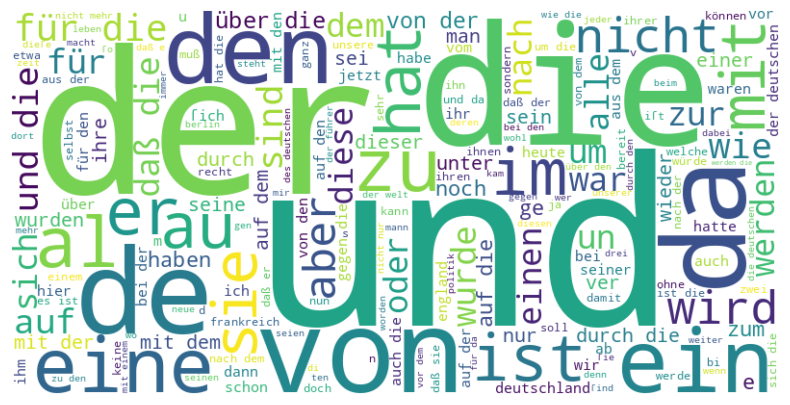

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tokenized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##  2. Basic NLP Task: Lemmatization and Stop Words Removal

The lexicographic reduction of inflected forms of a word to a base form, that is, the determination of the base form of a lexeme and the arrangement of the lemmas, is also called lemmatization.

In [7]:
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')



# Ensure the German language model is downloaded
!python -m spacy download de_core_news_sm

# Load the German language model
nlp = spacy.load('de_core_news_sm')

# Get German stop words and add custom ones
stop_words = set(stopwords.words('german'))
custom_stop_words = {'herr', 'frau', 'dez', 'januar', 'ge', 'nr', 'ſind', 'handeln', 'ver', 'ent', 'bi'}
stop_words.update(custom_stop_words)

def lemmatize_and_remove_stopwords(texts):
    texts_out = []
    for sent in texts:
        # Join the tokens into a single string
        text = " ".join(sent)


        # Process the text with spaCy
        doc = nlp(text)

        # Lemmatize, lowercase, and remove stop words
        lemmatized = [token.lemma_.lower() for token in doc
                      if token.is_alpha and token.lemma_.lower() not in stop_words]

        texts_out.append(lemmatized)

    return texts_out

# Apply the function to the DataFrame
df['lemmatized'] = lemmatize_and_remove_stopwords(df['tokenized'])

# Display the first 5 rows of the lemmatized column
df['lemmatized'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 93.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,lemmatized
0,"[ur, veröfsentlicht, n, kreizern, versenkt, gl..."
1,"[samstag, februar, neu, sag, dürener, bluttat,..."
2,"[lippisch, land, zeitung, erscheinen, ausnahme..."
3,"[enblatt, national, bezugspreis, träger, frei,..."
4,"[dre, hseder, sonde, wiosen, dep, großangriff,..."


##Let's visualize the results

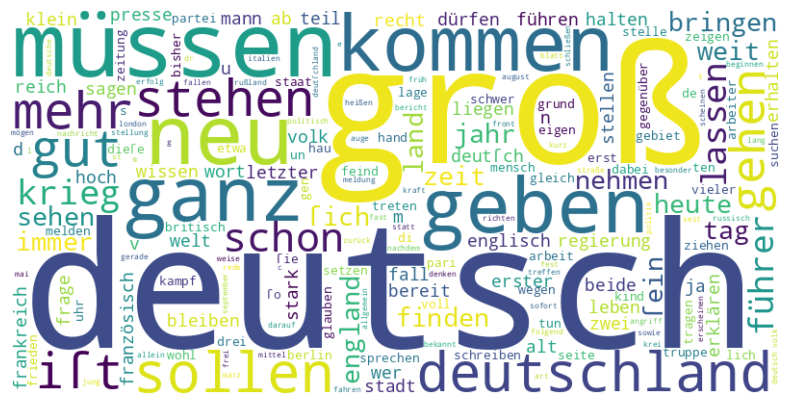

In [8]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['lemmatized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Unfortunaltey, this word cloud does not yet give a meaningful insight into our dataset. Let's try to process the data further in order to focus on words that carry more meaning.

Can you guess what part of speech carries more meaning when it comes to the detection of common themes?

## 3. Basic NLP Task: Part of Speech Tagging
Part-of-speech tagging (POS tagging) refers to the process of assigning words and punctuation marks in a text to their corresponding parts of speech (word classes). This process takes into account both the definition of the word and its context (e.g., adjacent adjectives or nouns).

In [9]:
def tagging(texts, allowed_postags=['VERB']): # possible tags'NOUN', 'ADJ', 'ADV', 'VERB'
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[veröfsentlichn, versenken, glauben, Eschlacht..."
1,"[Schwurgericht, düren, Aach, verstümmeln, düre..."
2,"[erscheinen, beziehen, berechnen, schen, verpf..."
3,"[bringen, agent, zustellgebühr, zeilen, gart, ..."
4,"[wiosen, verlieren, geben, richten, entwickeln..."


##Let's visualize the results

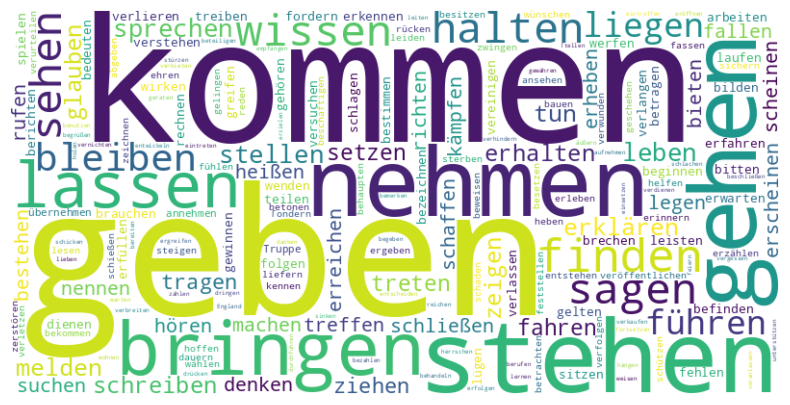

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like we are still not able to detect any common theme.

Any idea how we could solve this problem?

## 4. Basic NLP task: TF IDF Vectorizer

The problem with counting word occurrences is that some words are less frequent but important in a relation to a collection of documents.

For this reason, it is sometimes better to normalize the word counts by the number of times they appear in the documents. This is the general idea behind the tf-idf vectorization.

Tf stands for **term frequency**, the number of times the word appears in each document. We already did this before.

Idf stands for **inverse document frequency**, an inverse count of the number of documents a word appears in. Idf measures how significant a word is in the whole corpus.



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert the lists in 'lemmatized' column to strings
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# Create and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_str'])

# Get feature names (words) and their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
print("Feature Names:", feature_names)
print("TF-IDF Scores:", tfidf_scores)

# Create a DataFrame with words and their TF-IDF scores
word_tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_score': tfidf_scores})

# Sort by TF-IDF score in descending order (most frequent/important words first)
word_tfidf_df = word_tfidf_df.sort_values('tfidf_score', ascending=False)

# Select top N words (you can adjust this number)
top_n = 1000
top_words = word_tfidf_df['word'].head(top_n).tolist()

# Create the vectorized column in the original DataFrame
df['vectorized'] = df['tagging'].apply(lambda x: [word for word in x if word in top_words])

df['vectorized']

Feature Names: ['aa' 'aab' 'aaber' ... 'ꝛch' 'ꝛchtfeldern' 'ꝛir']
TF-IDF Scores: [0.31315672 0.06553577 0.02307405 ... 0.0273741  0.03388866 0.02478383]


,vectorized
0,"[glauben, kommen, lassen, berichten, erklären,..."
1,"[fallen, liegen, scheinen, kommen, geben, eröf..."
2,"[erscheinen, mehr, setzen, betrachten, scheine..."
3,"[bringen, melden, lassen, stehen, geben, krieg..."
4,"[verlieren, geben, richten, rufen, erhalten, r..."
...,...
395,"[werfen, geben, melden, bilden, verletzen, fin..."
396,"[kommen, nehmen, betrachten, kommen, bleiben, ..."
397,"[gewinn, glauben, kommen, empfangen, gehen, de..."
398,"[heißen, schlagen, führen, schreiben, greifen,..."


##Let's visualize the results

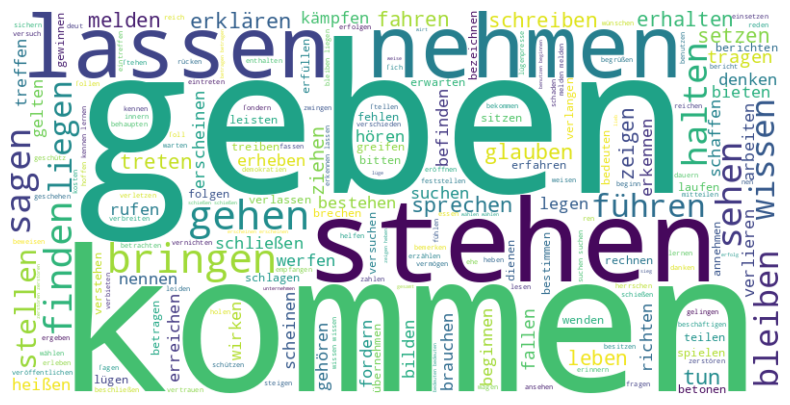

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['vectorized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Can you tell what is the common theme in the dataset?